# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [65]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [35]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [37]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [49]:
X = pd.DataFrame(df[['longitude', 'latitude' , 'housing_median_age', 'total_rooms' , 'total_bedrooms' , 'population' , 'households', 'median_income']])
y = pd.DataFrame(df[['median_house_value']])

<Axes: >

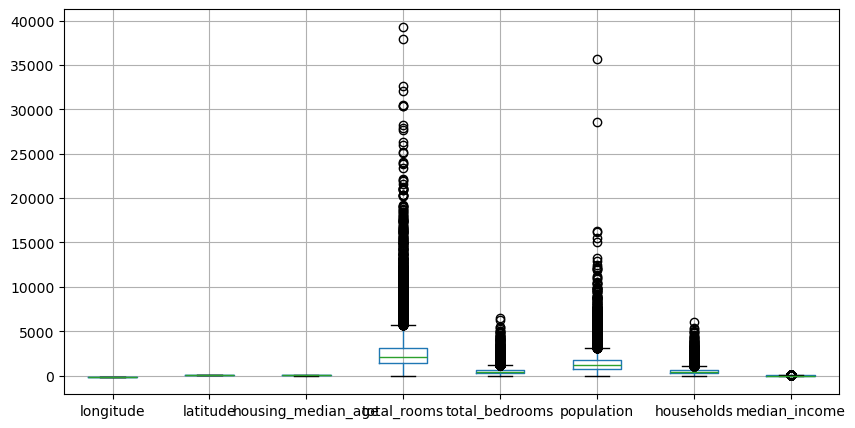

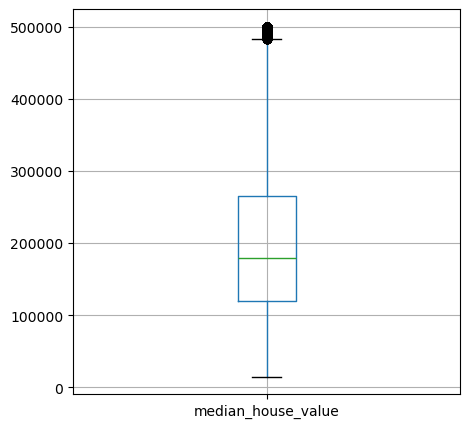

In [51]:
plt.figure(figsize=(10,5))
X.boxplot()
plt.figure(figsize=(5,5))
y.boxplot()

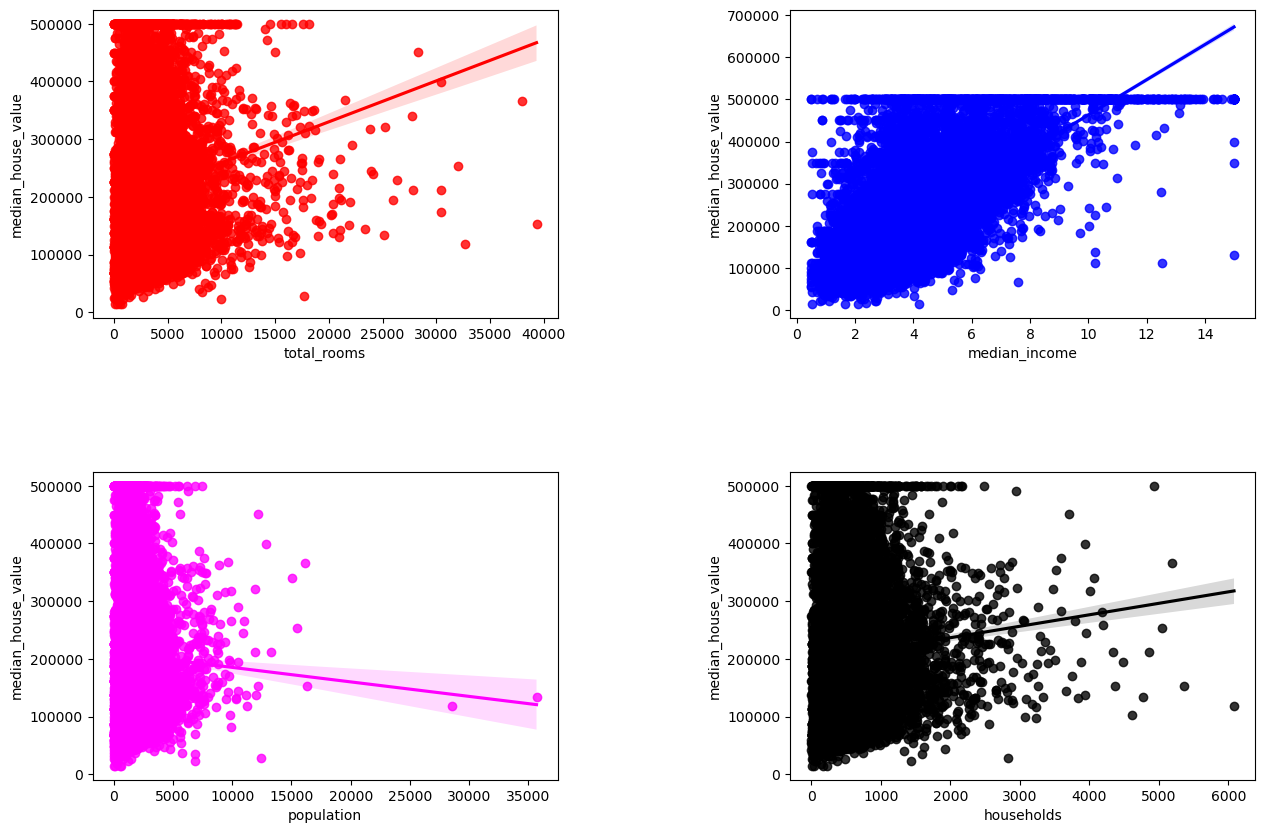

In [75]:
plt.close('all')

plt.rc('figure', figsize=(15, 10))
fig, axes = plt.subplots(2, 2)

sns.regplot(ax = axes[0, 0],x=X['total_rooms'], y=y['median_house_value'], color='red');
sns.regplot(ax = axes[0, 1],x=X['median_income'], y=y['median_house_value'], color='blue');
sns.regplot(ax = axes[1, 0],x=X['population'], y=y['median_house_value'], color='magenta');
sns.regplot(ax = axes[1, 1],x=X['households'], y=y['median_house_value'], color='black');

plt.subplots_adjust(wspace=0.5, hspace=0.5)

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

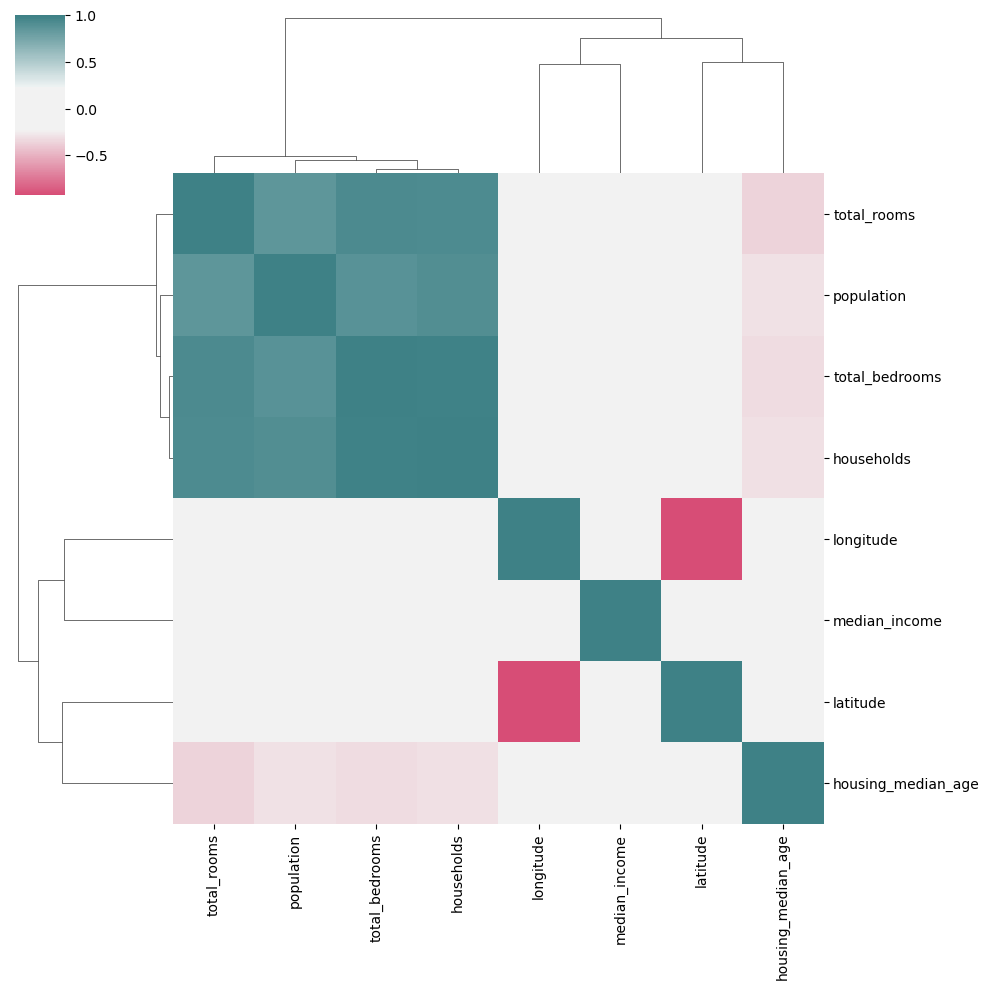

In [55]:
cmap = sns.diverging_palette(
    h_neg=0,
    h_pos=200,
    as_cmap=True,
    sep=60,
    center='light'
)

sns.clustermap(
    X.corr(),
    figsize=(10, 10),
    center=0,
    cmap=cmap
)

### 3. Separe os dados em validação e teste

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [61]:
regr1 = DecisionTreeRegressor(max_depth=8)
regr2 = DecisionTreeRegressor(max_depth=2)

regr1.fit(X_train, y_train)
regr2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [67]:
train1 = regr1.predict(X_train)
train2 = regr2.predict(X_train)


print('Para base de treinamento:')
print('O mse com profundidade = 2, MSE=', mean_squared_error(y_train,train1))
print('O mse com profundidade = 8, MSE=', mean_squared_error(y_train,train2))

Para base de treinamento:
O mse com profundidade = 2, MSE= 3631462701.9639277
O mse com profundidade = 8, MSE= 7411385612.543622


In [71]:
test1 = regr1.predict(X_test)
test2 = regr2.predict(X_test)


print('Para base de treinamento:')
print('O mse com profundidade = 2, MSE=', mean_squared_error(y_test,test1))
print('O mse com profundidade = 8, MSE=', mean_squared_error(y_test,test2))

Para base de treinamento:
O mse com profundidade = 2, MSE= 4358533118.384067
O mse com profundidade = 8, MSE= 7225244557.008624


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

In [ ]:
#O MSE da arvore com profundidade = 2 parece melhor que o, MSE da arvore com profundidade = 8 que parece ter sofrido um overfitting.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

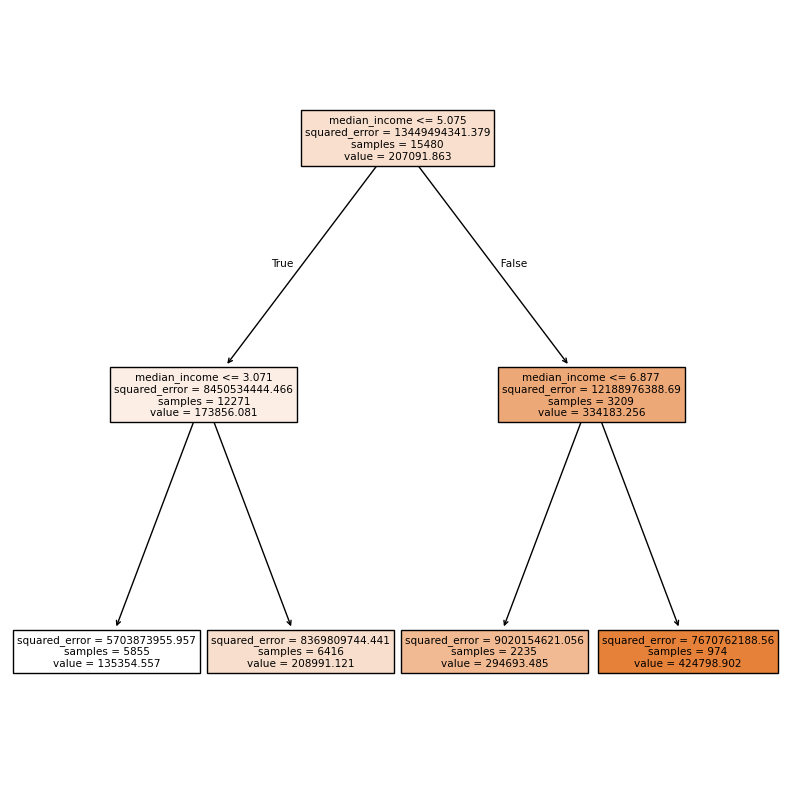

In [73]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(regr2, 
                    feature_names=X.columns,  
                    filled=True) 

In [ ]:
#A variável 'median_income' aparenta ser bem sólida para está tarefa